In [1]:
#pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
trk = pd.read_csv('untracked/trk_processed_25k.csv')


In [31]:
trk

,entry,subentry,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,unique_trk_id
0,0,0,2.623967,1.301414,-0.289234,999.0,-0.878906,2,0,0
1,0,1,3.435026,0.566814,-0.159267,999.0,3.339844,2,0,1
2,0,2,3.774908,1.815973,-0.240375,999.0,4.921875,1,1,2
3,0,3,2.641448,-1.435747,-0.128747,999.0,-0.468750,2,0,3
4,0,4,2.320653,1.837421,0.032604,999.0,4.980469,1,1,4
...,...,...,...,...,...,...,...,...,...,...
4562531,24999,194,2.807081,-2.373757,-0.638281,999.0,-0.058594,2,0,4562531
4562532,24999,195,2.472056,-2.244333,-0.792948,999.0,6.328125,2,0,4562532
4562533,24999,196,2.391643,-2.093290,-0.658689,999.0,-0.410156,2,0,4562533
4562534,24999,197,6.140490,2.403961,-0.539389,999.0,-7.441406,2,0,4562534


In [55]:

x_train, x_test, y_train, y_test = train_test_split(trk[['trk_pt', 'trk_eta']],trk['is_pv'], 
                                                   random_state=23, train_size=0.7)

# oversampling to 1 means both categories have as many samples 
oversample = RandomUnderSampler(sampling_strategy=1)

x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

In [56]:
y_over.value_counts()

0    1443
1    1443
Name: is_pv, dtype: int64

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1, max_depth=5)

rf.fit(x_train_over, y_train_over)

RandomForestClassifier(max_depth=5, n_estimators=1)

In [58]:
from sklearn.metrics import accuracy_score 

y_train_pred = rf.predict(x_train_over)
y_test_pred = rf.predict(x_test)


print("accuracy train: ", accuracy_score(y_train_over, y_train_pred),
      "\n accuracy test: ", accuracy_score(y_test, y_test_pred))


accuracy train:  0.713771802624966 
 accuracy test:  0.8439771442932696


In [59]:
unique, counts = np.unique(y_train_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 667797]
 [     1 303187]]


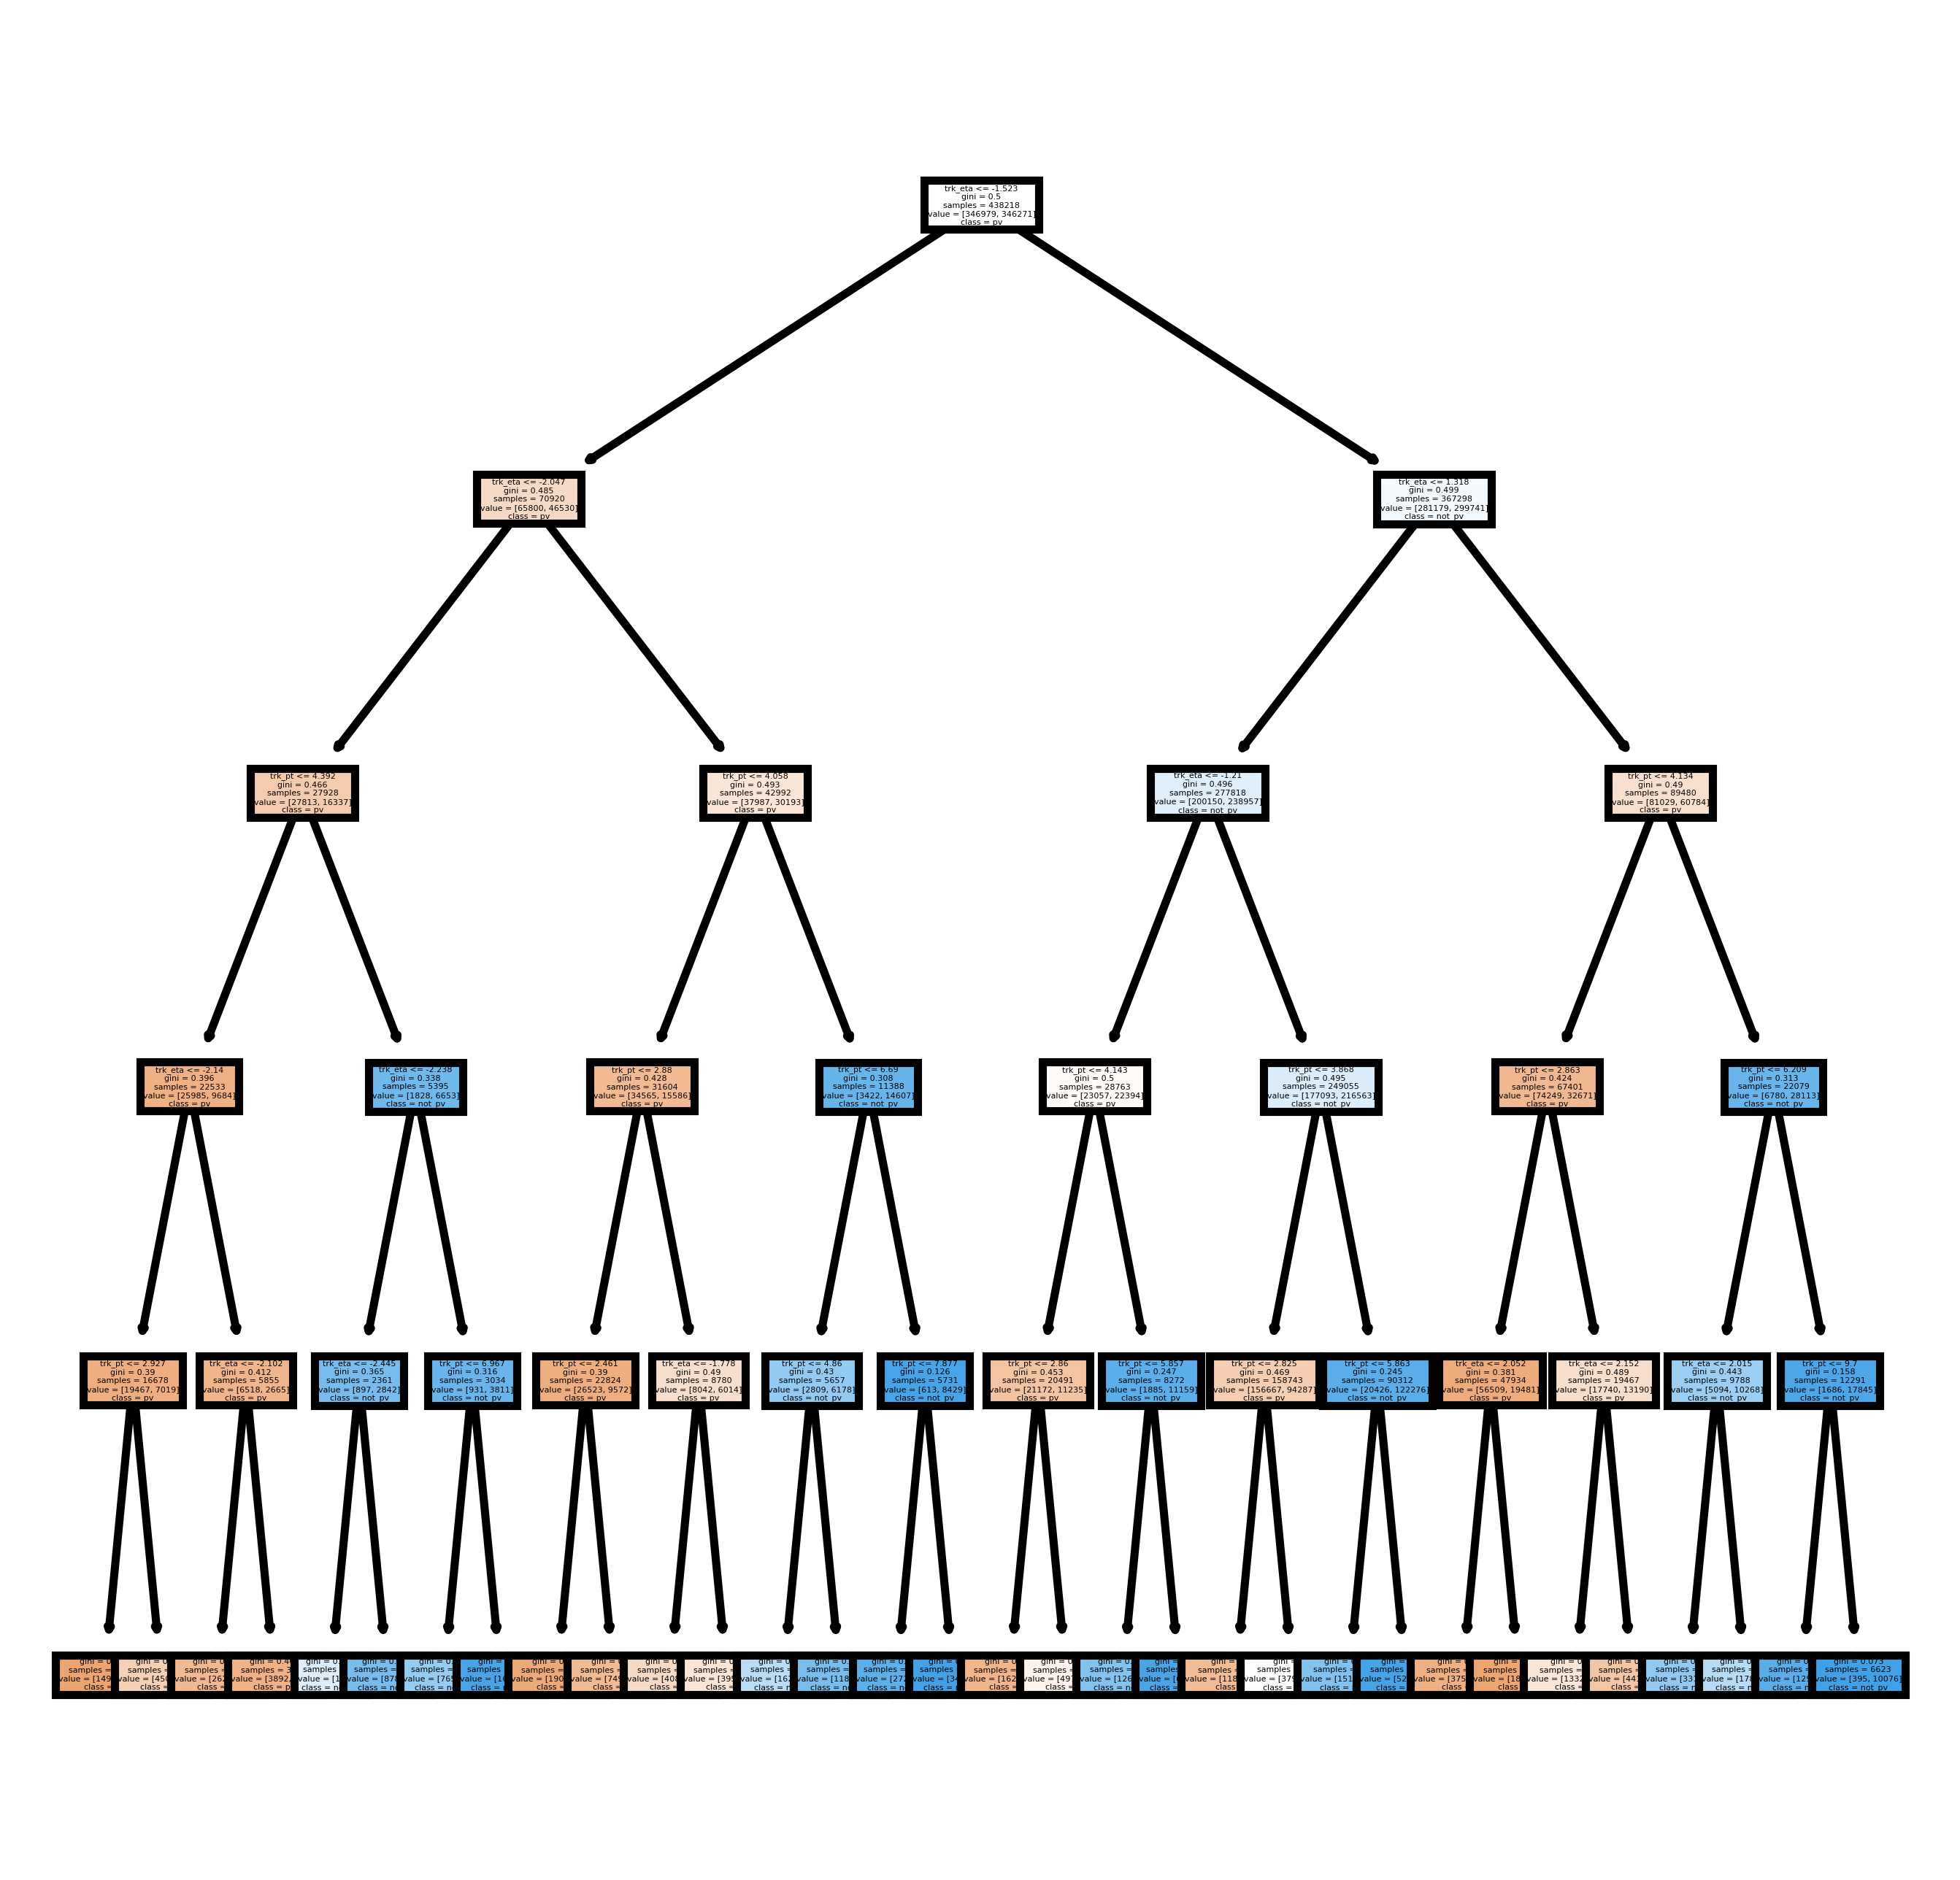

In [50]:
#estimator = rf.estimators_[0]
from sklearn import tree

from sklearn.tree import export_graphviz
fn=['trk_pt', 'trk_eta']
cn=['pv', 'not_pv']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

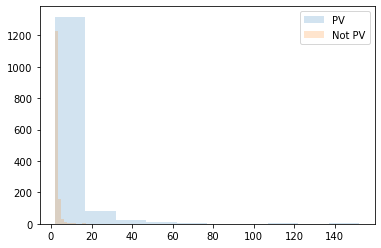

In [26]:
plt.hist(X_over.loc[np.where(y_over==1)[0]], alpha=0.2, label='PV')
plt.hist(X_over.loc[np.where(y_over==0)[0]], alpha=0.2, label='Not PV')
plt.legend()

In [27]:
trues = X_over.loc[np.where(y_over==1)[0]]

trues[trues['trk_pt'] > 5]

,trk_pt
1452,11.259640
1453,13.912287
1454,18.565226
1460,7.098469
1461,5.014456
...,...
2880,5.200002
2881,12.253868
2883,27.012177
2884,15.769894


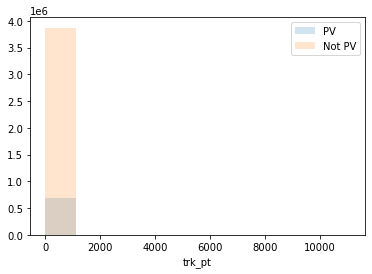

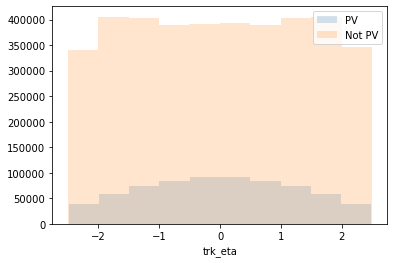

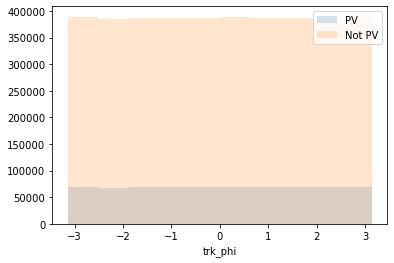

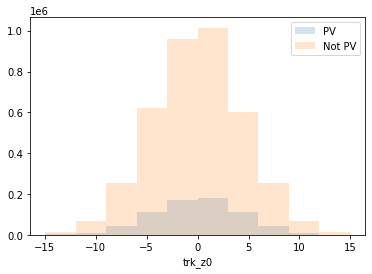

In [28]:
features = ['trk_pt', 'trk_eta', 'trk_phi', 'trk_z0']
for i in range(4): 
    plt.hist(trk[trk['is_pv']==1][features[i]], alpha =0.2,  label='PV')
    plt.hist(trk[trk['is_pv']==0][features[i]], alpha =0.2,  label='Not PV')
    plt.legend()
    plt.xlabel(features[i])
    plt.show() 

In [17]:
trk[trk['is_pv']==1]['trk_pt']

2           3.774908
4           2.320653
50          2.584265
52          4.013740
53          2.251015
             ...    
4562503    10.395136
4562504    19.375227
4562505    23.722233
4562508     8.187319
4562512     2.526053
Name: trk_pt, Length: 693566, dtype: float64